In [2]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from scipy import stats
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objs as go
import statsmodels.formula.api as smf

In [3]:
# In[ ]:
#############################################################################
#               REGRESSÃO LOGÍSTICA BINÁRIA - PARTE CONCEITUAL              #
#############################################################################

#Estabelecendo uma função para a probabilidade de ocorrência de um evento

from math import exp

#Estabelecendo uma função para a probabilidade de ocorrência de um evento
def prob(z):
    return 1 / (1 + exp(-z))

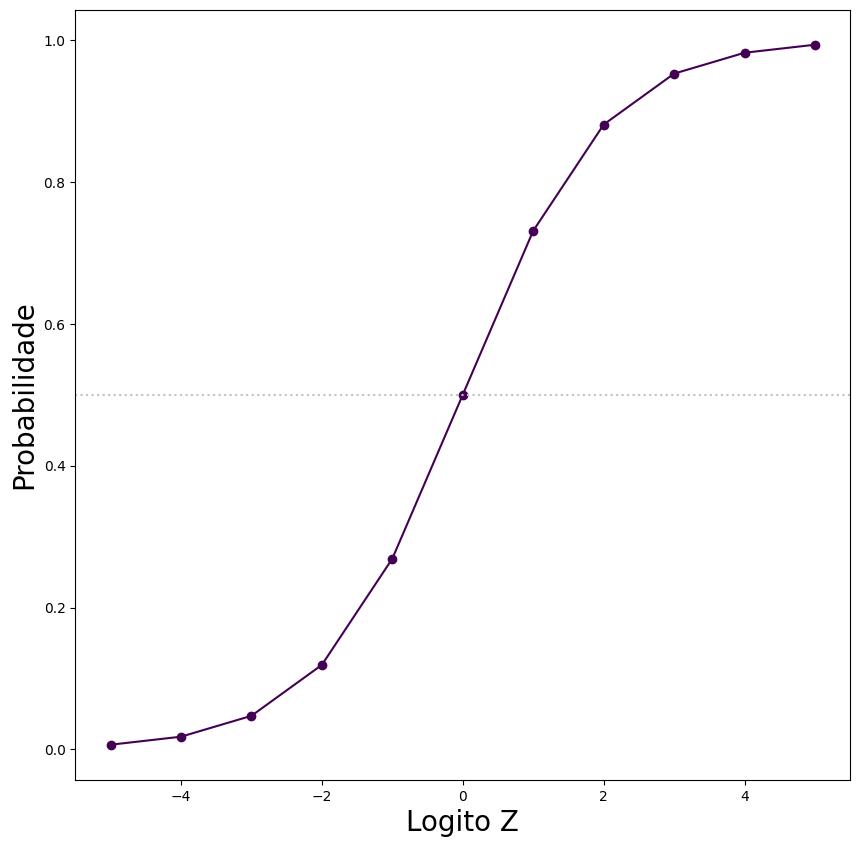

In [4]:
# In[ ]: Plotando a curva sigmóide teórica de ocorrência de um evento para um
#range do logito z entre -5 e +5

logitos = []
probs = []

for i in np.arange(-5,6):
    logitos.append(i)
    probs.append(prob(i))
    
df = pd.DataFrame({'logito':logitos,'probs':probs})

plt.figure(figsize=(10,10))
plt.plot(df.logito, df.probs, color="#440154FF")
plt.scatter(df.logito, df.probs, color = "#440154FF")
plt.axhline(y = df.probs.mean(), color = '#bdc3c7', linestyle = ':')
plt.xlabel("Logito Z", fontsize=20)
plt.ylabel("Probabilidade", fontsize=20)
plt.show()

In [6]:
# In[ ]:
#############################################################################
#                      REGRESSÃO LOGÍSTICA BINÁRIA                          #                  
#               EXEMPLO 01 - CARREGAMENTO DA BASE DE DADOS                  #
#############################################################################

df_atrasado = pd.read_csv('atrasado.csv',delimiter=',')
df_atrasado

#Características das variáveis do dataset
df_atrasado.info()

#Estatísticas univariadas
df_atrasado.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   atrasado   100 non-null    int64  
 2   dist       100 non-null    float64
 3   sem        100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


,atrasado,dist,sem
count,100.000000,100.000000,100.000000
mean,0.590000,14.073000,10.210000
std,0.494311,4.330112,1.578229
min,0.000000,1.000000,5.000000
25%,0.000000,12.000000,10.000000
50%,1.000000,13.350000,10.000000
75%,1.000000,16.125000,10.000000
max,1.000000,29.000000,18.000000


In [7]:
# In[ ]: Tabela de frequências absolutas da variável 'atrasado'

df_atrasado['atrasado'].value_counts() 


atrasado
1    59
0    41
Name: count, dtype: int64

In [8]:
# In[ ]: Estimação de um modelo logístico binário

modelo_atrasos = smf.glm(formula='atrasado ~ dist + sem', data=df_atrasado,
                         family=sm.families.Binomial()).fit()

#Parâmetros do modelo
modelo_atrasos.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               atrasado   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -50.466
Date:                Fri, 12 Jan 2024   Deviance:                       100.93
Time:                        10:25:29   Pearson chi2:                     86.7
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2913
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -26.1665      8.442     -3.100      0.002     -42.712      -9.621
dist           0.1904      0.076      2.493      0.013       0.041       0.340
sem            2.3629      0.795      2.972      0.003       0.804       3.921
==============================================================================
"""

In [9]:
# In[ ]: Outro modo mais completo de apresentar os outputs do modelo,
#pela função 'summary_col'

summary_col([modelo_atrasos],
            model_names=["MODELO"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs)),
                'Log-lik':lambda x: "{:.2f}".format(x.llf)
        })


,MODELO
Intercept,-26.1665***
,(8.4420)
dist,0.1904**
,(0.0764)
sem,2.3629***
,(0.7951)
N,100
Log-lik,-50.47


In [10]:
# In[ ]: Fazendo predições para o 'modelo_atrasos'.
#Exemplo: qual a probabilidade média de se chegar atrasado quando o
#trajeto tem 7 km e passa-se por 10 semáforos no percurso?

modelo_atrasos.predict(pd.DataFrame({'dist':[7], 'sem':[10]}))

0    0.230566
dtype: float64

In [11]:
# In[ ]: Construção de uma matriz de confusão

# Adicionando os valores previstos de probabilidade na base de dados
df_atrasado['phat'] = modelo_atrasos.predict()

#Visualizando a base de dados com a variável 'phat'
df_atrasado


,estudante,atrasado,dist,sem,phat
0,Gabriela,0,12.5,7,0.000712
1,Patricia,0,13.3,10,0.498561
2,Gustavo,0,13.4,8,0.008903
3,Leticia,0,23.5,7,0.005751
4,Luiz Ovidio,0,9.5,8,0.004257
...,...,...,...,...,...
95,Sheila,1,24.0,10,0.884040
96,Pedro,1,10.0,10,0.346606
97,Horacio,1,9.4,10,0.321210
98,Leandro,1,14.2,10,0.541301


In [12]:
# In[ ]: Construção de função para a definição da matriz de confusão

from sklearn.metrics import confusion_matrix, accuracy_score,\
    ConfusionMatrixDisplay, recall_score

def matriz_confusao(observado,predicts,cutoff):
    
    values = predicts.values
    
    predicao_binaria = []
    
    for item in values:
        if item >= cutoff:
            predicao_binaria.append(1)
        else:
            predicao_binaria.append(0)
    
    cm = confusion_matrix(observado, predicao_binaria)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    
    sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
    especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
    acuracia = accuracy_score(observado, predicao_binaria)

    #Visualizando os principais indicadores desta matriz de confusão
    indicadores = pd.DataFrame({'Sensitividade':[sensitividade],
                                'Especificidade':[especificidadee],
                                'Acurácia':[acuracia]})
    return indicadores

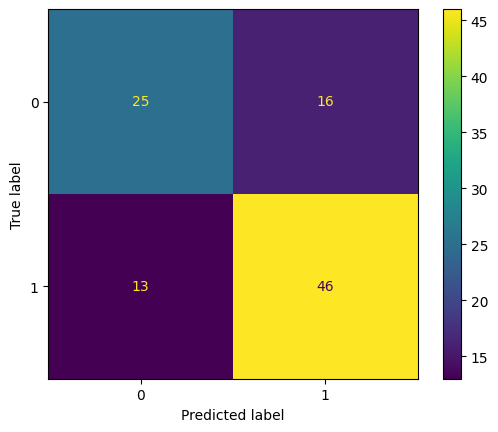

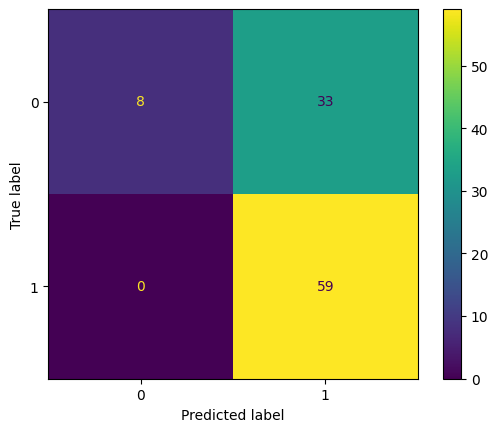

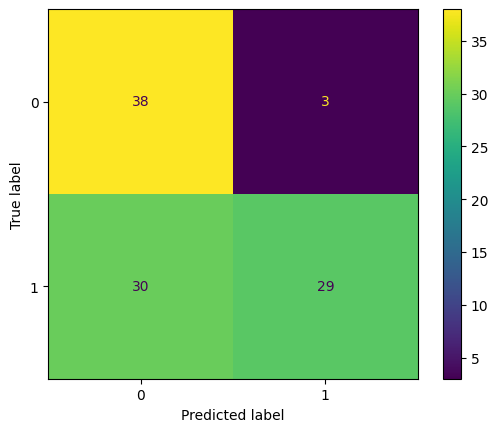

,Sensitividade,Especificidade,Acurácia
0,0.491525,0.926829,0.67


In [13]:
# In[ ]: Matrizes de confusão propriamente ditas

#Matriz de confusão para cutoff = 0.5
matriz_confusao(observado=df_atrasado['atrasado'],
                predicts=df_atrasado['phat'], 
                cutoff=0.5)

#Matriz de confusão para cutoff = 0.3
matriz_confusao(observado=df_atrasado['atrasado'],
                predicts=df_atrasado['phat'], 
                cutoff=0.3)

#Matriz de confusão para cutoff = 0.7
matriz_confusao(observado=df_atrasado['atrasado'],
                predicts=df_atrasado['phat'], 
                cutoff=0.7)

In [14]:
# In[ ]: Igualando critérios de especificidade e de sensitividade

#Tentaremos estabelecer um critério que iguale a probabilidade de
#acerto daqueles que chegarão atrasados (sensitividade) e a probabilidade de
#acerto daqueles que não chegarão atrasados (especificidade).

#ATENÇÃO: o que será feito a seguir possui fins didáticos, apenas. DE NENHUMA
#FORMA o procedimento garante a maximização da acurácia do modelo!

#Criação da função 'espec_sens' para a construção de um dataset com diferentes
#valores de cutoff, sensitividade e especificidade:

def espec_sens(observado,predicts):
    
    # adicionar objeto com os valores dos predicts
    values = predicts.values
    
    # range dos cutoffs a serem analisados em steps de 0.01
    cutoffs = np.arange(0,1.01,0.01)
    
    # Listas que receberão os resultados de especificidade e sensitividade
    lista_sensitividade = []
    lista_especificidade = []
    
    for cutoff in cutoffs:
        
        predicao_binaria = []
        
        # Definindo resultado binário de acordo com o predict
        for item in values:
            if item >= cutoff:
                predicao_binaria.append(1)
            else:
                predicao_binaria.append(0)
                
        # Cálculo da sensitividade e especificidade no cutoff
        sensitividade = recall_score(observado, predicao_binaria, pos_label=1)
        especificidadee = recall_score(observado, predicao_binaria, pos_label=0)
        
        # Adicionar valores nas listas
        lista_sensitividade.append(sensitividade)
        lista_especificidade.append(especificidadee)
        
    # Criar dataframe com os resultados nos seus respectivos cutoffs
    resultado = pd.DataFrame({'cutoffs':cutoffs,'sensitividade':lista_sensitividade,'especificidade':lista_especificidade})
    return resultado

In [15]:
# In[ ]: Até o momento, foram extraídos 3 vetores: 'sensitividade',
#'especificidade' e 'cutoffs'. Assim, criamos um dataframe que contém
#os vetores mencionados

dados_plotagem = espec_sens(observado = df_atrasado['atrasado'],
                            predicts = df_atrasado['phat'])
dados_plotagem


,cutoffs,sensitividade,especificidade
0,0.00,1.000000,0.000000
1,0.01,1.000000,0.170732
2,0.02,1.000000,0.170732
3,0.03,1.000000,0.170732
4,0.04,1.000000,0.170732
...,...,...,...
96,0.96,0.135593,1.000000
97,0.97,0.135593,1.000000
98,0.98,0.135593,1.000000
99,0.99,0.101695,1.000000


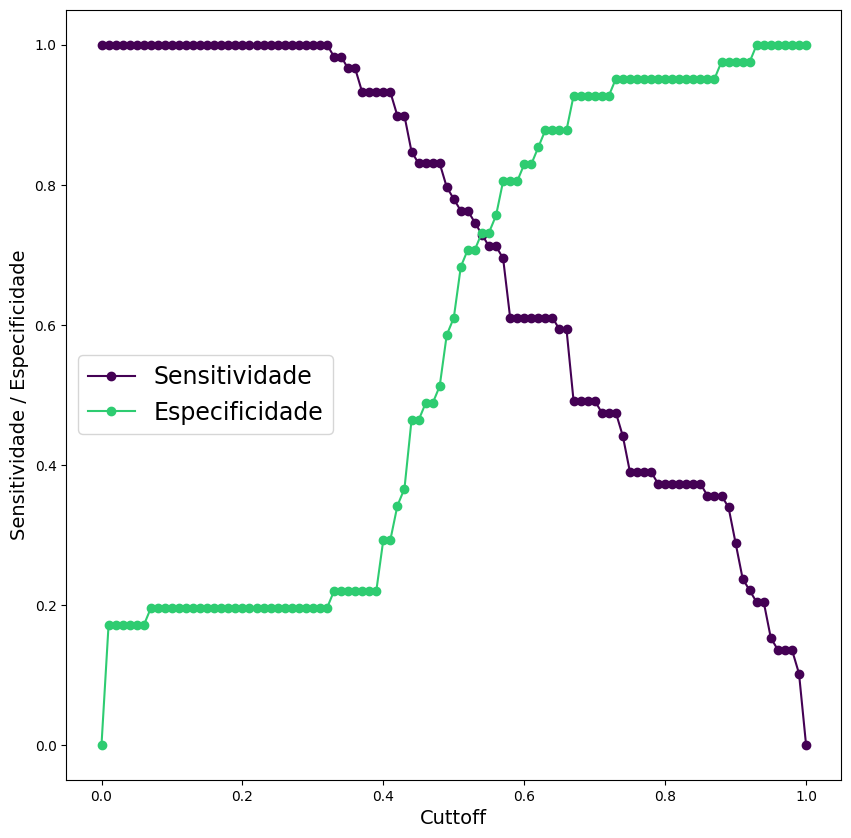

In [16]:
# In[ ]: Visualizando o novo dataframe 'dados_plotagem' e plotando os dados
#em um gráfico que mostra a variação da especificidade e da sensitividade
#em função do cutoff

plt.figure(figsize=(10,10))
plt.plot(dados_plotagem.cutoffs,dados_plotagem.sensitividade, '-o',
         color="#440154FF")
plt.plot(dados_plotagem.cutoffs,dados_plotagem.especificidade, '-o',
         color="#2ecc71")
plt.legend(['Sensitividade', 'Especificidade'], fontsize=17)
plt.xlabel("Cuttoff", fontsize=14)
plt.ylabel("Sensitividade / Especificidade", fontsize=14)
plt.show()

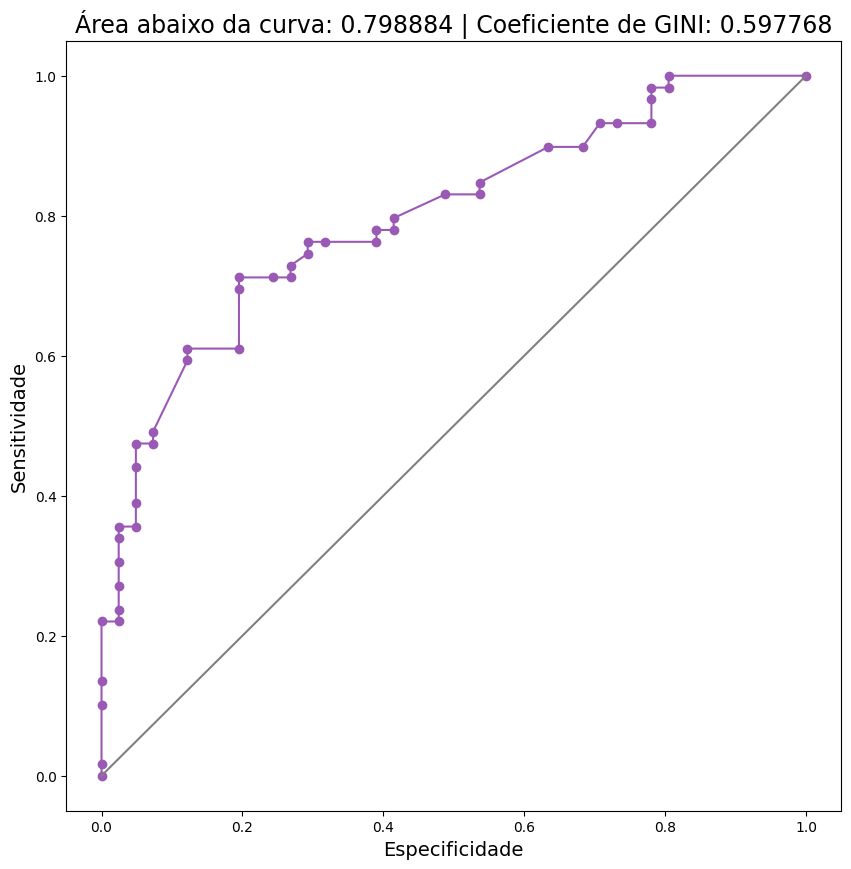

In [17]:
# In[ ]: Construção da curva ROC

from sklearn.metrics import roc_curve, auc

#Função 'roc_curve' do pacote 'metrics' do sklearn

fpr, tpr, thresholds =roc_curve(df_atrasado['atrasado'],df_atrasado['phat'])
roc_auc = auc(fpr, tpr)

#Cálculo do coeficiente de GINI
gini = (roc_auc - 0.5)/(0.5)

#Plotando a curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, '-o', color="#9b59b6")
plt.plot(fpr,fpr, color='gray')
plt.title("Área abaixo da curva: %f" % roc_auc +
          " | Coeficiente de GINI: %f" % gini, fontsize=17)
plt.xlabel("Especificidade", fontsize=14)
plt.ylabel("Sensitividade", fontsize=14)
plt.show()

REGRESSÃO LOGÍSTICA MULTINOMIAL

In [43]:
# In[ ]:
#############################################################################
#                      REGRESSÃO LOGÍSTICA MULTINOMIAL                      #
#                EXEMPLO 04 - CARREGAMENTO DA BASE DE DADOS                 #
#############################################################################

df_atrasado_multinomial = pd.read_csv('atrasado_multinomial.csv',delimiter=',')
df_atrasado_multinomial

#Características das variáveis do dataset
df_atrasado_multinomial.info()

#Estatísticas univariadas
df_atrasado_multinomial.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   atrasado   100 non-null    object 
 2   dist       100 non-null    float64
 3   sem        100 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


,dist,sem
count,100.000000,100.000000
mean,17.673000,13.810000
std,5.130299,3.329376
min,1.000000,10.000000
25%,14.950000,10.000000
50%,18.750000,15.000000
75%,21.000000,18.000000
max,31.500000,19.000000


In [44]:
# In[ ]: Note que a variável Y 'atrasado' está definida como objeto

#Tabela de frequências absolutas da variável 'atrasado' com labels
df_atrasado_multinomial['atrasado'].value_counts(sort=False)

#Criando uma variável 'atrasado2' a partir da variável 'atrasado',
#com labels iguais a 0, 1 e 2 e com tipo 'int' (poderia também ser do tipo
#'float'), a fim de que seja possível estimar o modelo por meio
#da função 'MNLogit'
df_atrasado_multinomial.loc[df_atrasado_multinomial['atrasado']==
                            'nao chegou atrasado',
                            'atrasado2'] = 0 #categoria de referência
df_atrasado_multinomial.loc[df_atrasado_multinomial['atrasado']==
                            'chegou atrasado primeira aula',
                            'atrasado2'] = 1
df_atrasado_multinomial.loc[df_atrasado_multinomial['atrasado']==
                            'chegou atrasado segunda aula',
                            'atrasado2'] = 2

df_atrasado_multinomial['atrasado2'] =\
    df_atrasado_multinomial['atrasado2'].astype('int64')
    
df_atrasado_multinomial

,estudante,atrasado,dist,sem,atrasado2
0,Gabriela,chegou atrasado segunda aula,20.500000,15,2
1,Patricia,chegou atrasado segunda aula,21.299999,18,2
2,Gustavo,chegou atrasado segunda aula,21.400000,16,2
3,Leticia,chegou atrasado segunda aula,31.500000,15,2
4,Luiz Ovidio,chegou atrasado segunda aula,17.500000,16,2
...,...,...,...,...,...
95,Sheila,nao chegou atrasado,24.000000,10,0
96,Pedro,chegou atrasado primeira aula,15.000000,15,1
97,Horacio,chegou atrasado primeira aula,14.400000,15,1
98,Leandro,chegou atrasado segunda aula,22.200001,18,2


In [45]:
# In[ ]: Estimação do modelo logístico multinomial

from statsmodels.discrete.discrete_model import MNLogit

x = df_atrasado_multinomial.drop(columns=['estudante','atrasado','atrasado2'])
y = df_atrasado_multinomial['atrasado2']

#Esse pacote precisa que a constante seja definida pelo usuário
X = sm.add_constant(x)

#Estimação do modelo - função 'MNLogit' do pacote
#'statsmodels.discrete.discrete_model'
modelo_atrasado = MNLogit(endog=y, exog=X).fit()

#Parâmetros do modelo
modelo_atrasado.summary()
x

Optimization terminated successfully.
         Current function value: 0.245118
         Iterations 10


,dist,sem
0,20.500000,15
1,21.299999,18
2,21.400000,16
3,31.500000,15
4,17.500000,16
...,...,...
95,24.000000,10
96,15.000000,15
97,14.400000,15
98,22.200001,18


In [38]:
# In[ ]: Vamos definir uma função 'Qui2' para se extrair a estatística geral
# do modelo

def Qui2(modelo_multinomial):
    maximo = modelo_multinomial.llf
    minimo = modelo_multinomial.llnull
    qui2 = -2*(minimo - maximo)
    pvalue = stats.distributions.chi2.sf(qui2,1)
    df = pd.DataFrame({'Qui quadrado':[qui2],
                       'pvalue':[pvalue]})
    return df

In [39]:
# In[ ]: Estatística geral do 'modelo_atrasado'

Qui2(modelo_atrasado)

,Qui quadrado,pvalue
0,153.014842,3.802150e-35


In [23]:
# In[ ]: Fazendo predições para o 'modelo_atrasado'

# Exemplo: qual a probabilidade média de atraso para cada categoria da
#variável dependente, se o indivíduo tiver que percorrer 22km e passar
#por 12 semáforos?

#No nosso exemplo, tempos que:
# 0: não chegou atrasado
# 1: chegou atrasado primeira aula
# 2: chegou atrasado segunda aula

resultado = modelo_atrasado.predict(pd.DataFrame({'const':[1],
                                                   'dist':[22],
                                                   'sem':[12]})).round(4)

resultado

#Uma maneira de identificar a classe do resultado de acordo com o predict

resultado.idxmax(axis=1)

0    0
dtype: int64

In [40]:
# In[ ]: Adicionando as probabilidades de ocorrência de cada uma das
#categorias de Y definidas pela modelagem, bem como a respectiva
#classificação, ao dataframe original

#Probabilidades de ocorrência das três categoriais
#Definição do array 'phats':
phats = modelo_atrasado.predict()
phats

#Transformação do array 'phats' para o dataframe 'phats':
phats = pd.DataFrame(phats)
phats

#Concatenando o dataframe original com o dataframe 'phats':
df_atrasado_multinomial = pd.concat([df_atrasado_multinomial, phats], axis=1)
df_atrasado_multinomial

# Analisando o resultado de acordo com a categoria de resposta:
classificacao = phats.idxmax(axis=1)
classificacao

#Adicionando a categoria de resposta 'classificacao' ao dataframe original,
#por meio da criação da variável 'predicao'
df_atrasado_multinomial['predicao'] = classificacao
df_atrasado_multinomial

#Criando a variável 'predicao_label' a partir da variável 'predicao',
#respeitando os seguintes rótulos:
# 0: não chegou atrasado
# 1: chegou atrasado primeira aula
# 2: chegou atrasado segunda aula

df_atrasado_multinomial.loc[df_atrasado_multinomial['predicao']==0,
                            'predicao_label'] ='não chegou atrasado'
df_atrasado_multinomial.loc[df_atrasado_multinomial['predicao']==1,
                            'predicao_label'] ='chegou atrasado primeira aula'
df_atrasado_multinomial.loc[df_atrasado_multinomial['predicao']==2,
                            'predicao_label'] ='chegou atrasado segunda aula'

df_atrasado_multinomial


,estudante,atrasado,dist,sem,atrasado2,0,1,2,predicao,predicao_label
0,Gabriela,chegou atrasado segunda aula,20.500000,15,2,1.801024e-02,0.523388,4.586018e-01,1,chegou atrasado primeira aula
1,Patricia,chegou atrasado segunda aula,21.299999,18,2,2.751301e-06,0.018737,9.812605e-01,2,chegou atrasado segunda aula
2,Gustavo,chegou atrasado segunda aula,21.400000,16,2,6.796190e-04,0.173472,8.258489e-01,2,chegou atrasado segunda aula
3,Leticia,chegou atrasado segunda aula,31.500000,15,2,2.759476e-07,0.003748,9.962518e-01,2,chegou atrasado segunda aula
4,Luiz Ovidio,chegou atrasado segunda aula,17.500000,16,2,2.083782e-02,0.601588,3.775739e-01,1,chegou atrasado primeira aula
...,...,...,...,...,...,...,...,...,...,...
95,Sheila,nao chegou atrasado,24.000000,10,0,9.531361e-01,0.046317,5.471598e-04,0,não chegou atrasado
96,Pedro,chegou atrasado primeira aula,15.000000,15,1,4.146183e-01,0.557343,2.803830e-02,1,chegou atrasado primeira aula
97,Horacio,chegou atrasado primeira aula,14.400000,15,1,5.008256e-01,0.481441,1.773339e-02,0,não chegou atrasado
98,Leandro,chegou atrasado segunda aula,22.200001,18,2,1.049763e-06,0.011822,9.881774e-01,2,chegou atrasado segunda aula


In [41]:
# In[ ]: Eficiência global do modelo

#Criando uma tabela para comparar as ocorrências reais com as predições
table = pd.pivot_table(df_atrasado_multinomial,
                       index=['predicao_label'],
                       columns=['atrasado'],
                       aggfunc='size')

#Substituindo 'nan' por zero
table = table.fillna(0)
table

#Transformando o dataframe 'table' para 'array', para que seja possível
#estabelecer o atributo 'diagonal'
table = table.to_numpy()
table

#Eficiência global do modelo
acuracia = table.diagonal().sum()/table.sum()
acuracia

0.89

TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 5 keyword-only arguments) were given

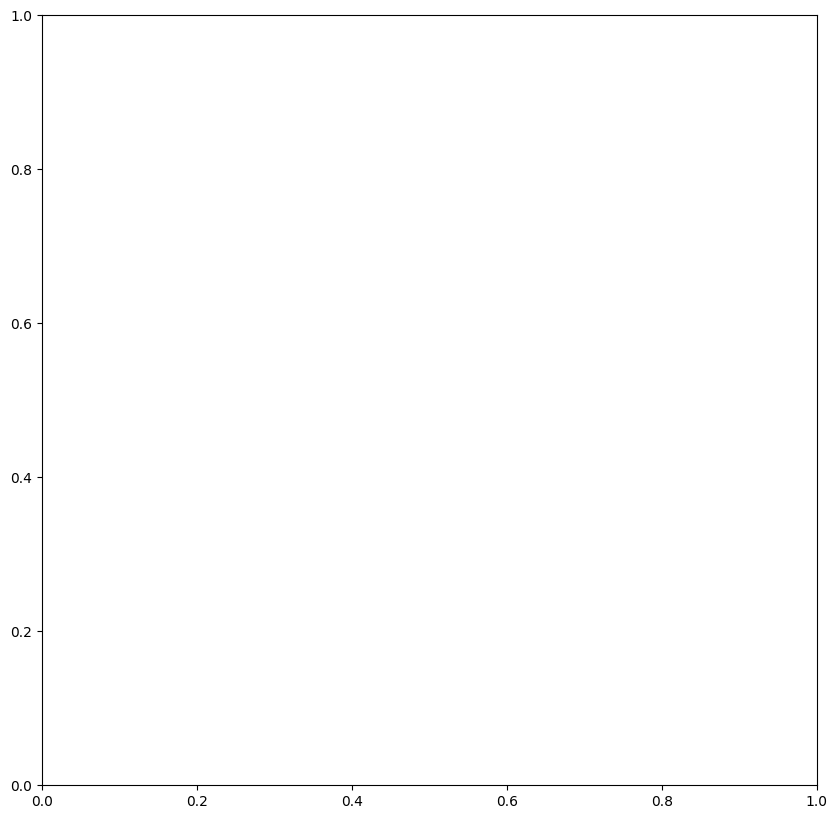

In [42]:
# In[ ]: Plotagens das probabilidades

#Plotagem das smooth probability lines para a variável 'dist'

# 0: não chegou atrasado
# 1: chegou atrasado primeira aula
# 2: chegou atrasado segunda aula

fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(df_atrasado_multinomial['dist'],
            df_atrasado_multinomial[0],
            ci=False, ax=ax,
            label='não chegou atrasado', order=4, marker=".")
sns.regplot(df_atrasado_multinomial['dist'],
            df_atrasado_multinomial[1],
            ci=False, ax=ax,
            label='chegou atrasado primeira aula', order=4, marker=".")
sns.regplot(df_atrasado_multinomial['dist'],
            df_atrasado_multinomial[2],
            ci=False, ax=ax,
            label='chegou atrasado segunda aula', order=4, marker=".")
ax.set(ylabel='Probabilidades', xlabel='Distância percorrida')
ax.legend()
plt.show()


TypeError: regplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 5 keyword-only arguments) were given

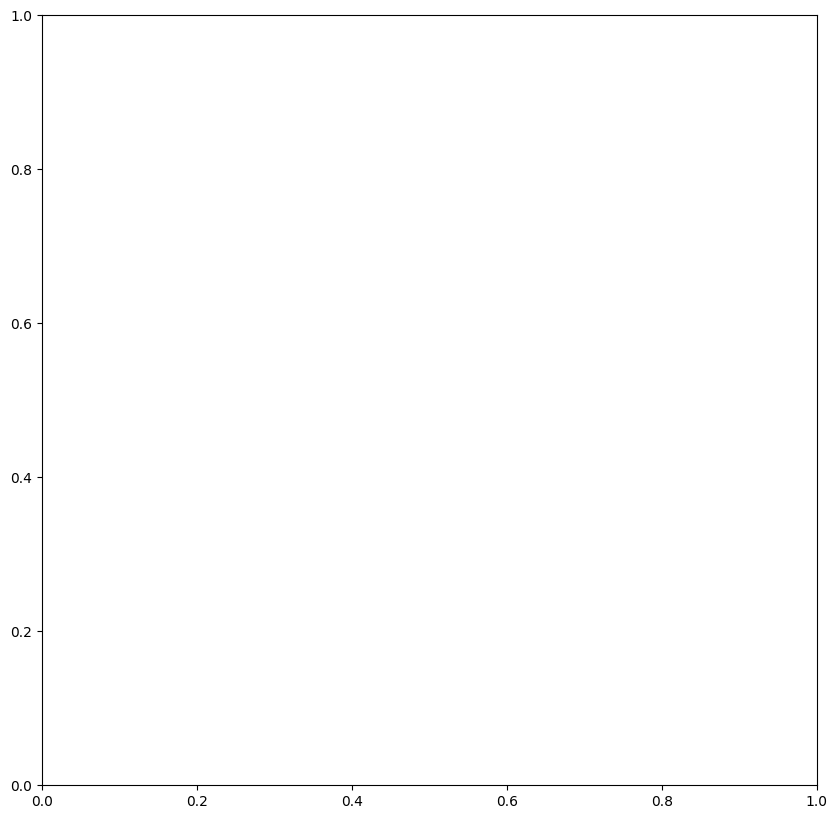

In [27]:
# In[ ]: Plotagens das probabilidades

#Plotagem das smooth probability lines para a variável 'sem'

# 0: não chegou atrasado
# 1: chegou atrasado primeira aula
# 2: chegou atrasado segunda aula

fig, ax = plt.subplots(figsize=(10, 10))
sns.regplot(df_atrasado_multinomial['sem'],
            df_atrasado_multinomial[0],
            ci=False, ax=ax,
            label='não chegou atrasado', order=4, marker=".")
sns.regplot(df_atrasado_multinomial['sem'],
            df_atrasado_multinomial[1],
            ci=False, ax=ax,
            label='chegou atrasado primeira aula', order=4, marker=".")
sns.regplot(df_atrasado_multinomial['sem'],
            df_atrasado_multinomial[2],
            ci=False, ax=ax,
            label='chegou atrasado segunda aula', order=4, marker=".")
ax.set(ylabel='Probabilidades', xlabel='Semáforos no percurso')
ax.legend()
plt.show()

In [30]:
# In[ ]: Plotagem tridimensional para cada probabilidade de ocorrência de cada
#categoria da variável dependente

#Probabilidades de não chegar atrasado (função 'go' do pacote 'plotly')

import plotly.io as pio
pio.renderers.default = 'browser'

trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[0],
    opacity=1, intensity=df_atrasado_multinomial[0], colorscale="Viridis")

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_layout(scene = dict(
                        xaxis_title='dist',
                        yaxis_title='sem',
                        zaxis_title='não chegou atrasado'))

plot_figure.show()


In [31]:
# In[ ]: Plotagem tridimensional para cada probabilidade de ocorrência de cada
#categoria da variável dependente

#Probabilidades de chegar atrasado à primeira aula (função 'go' do pacote
#'plotly')

pio.renderers.default = 'browser'

trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[1],
    opacity=1, intensity=df_atrasado_multinomial[1], colorscale="Viridis")

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_layout(scene = dict(
                        xaxis_title='dist',
                        yaxis_title='sem',
                        zaxis_title='chegou atrasado à primeira aula'))

plot_figure.show()

In [ ]:
# In[ ]: Plotagem tridimensional para cada probabilidade de ocorrência de cada
#categoria da variável dependente

#Probabilidades de chegar atrasado à segunda aula (função 'go' do pacote
#'plotly')

pio.renderers.default = 'browser'

trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[2],
    opacity=1, intensity=df_atrasado_multinomial[2], colorscale="Viridis")

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

plot_figure.update_layout(scene = dict(
                        xaxis_title='dist',
                        yaxis_title='sem',
                        zaxis_title='chegou atrasado à segunda aula'))

plot_figure.show()

In [32]:
# In[ ]: Visualização das sigmóides tridimensionais em um único gráfico

pio.renderers.default = 'browser'

trace = go.Mesh3d(
    x=df_atrasado_multinomial['dist'], 
    y=df_atrasado_multinomial['sem'],
    z=df_atrasado_multinomial[0],
    opacity=1)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

trace_1 = go.Mesh3d(
            x=df_atrasado_multinomial['dist'], 
            y=df_atrasado_multinomial['sem'],
            z=df_atrasado_multinomial[1],
            opacity=1)

plot_figure.add_trace(trace_1)

trace_2 = go.Mesh3d(
            x=df_atrasado_multinomial['dist'], 
            y=df_atrasado_multinomial['sem'],
            z=df_atrasado_multinomial[2],
            opacity=1)


plot_figure.add_trace(trace_2)

plot_figure.update_layout(scene = dict(
                        xaxis_title='dist',
                        yaxis_title='sem',
                        zaxis_title='probabilidades'))

plot_figure.show()